<a href="https://colab.research.google.com/github/DariuszKobiela/DigitPredictorAI/blob/master/NN_GOOGLE_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow
tensorflow.__version__

'2.2.0-rc3'

# IMPORTS

In [0]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.metrics import Accuracy, Recall, Precision
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model


def load_data_for_NN(root_directory):
    mnist_train = pd.read_csv(root_directory+"data/mnist_train.csv")
    mnist_test = pd.read_csv(root_directory+"data/mnist_test.csv")
    y_train = mnist_train.label.values
    y_test = mnist_test.label.values
    x_train = mnist_train.values[:, 1:]
    x_test = mnist_test.values[:, 1:]
    # Standarization
    x_train = np.array([(x - x.mean()) / x.std() for x in x_train])
    x_test = np.array([(x - x.mean()) / x.std() for x in x_test])
    x_train = x_train.astype('float32').reshape(-1, 28, 28, 1)
    x_test = x_test.astype('float32').reshape(-1, 28, 28, 1)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, y_train, x_test, y_test


def load_images(root_directory):
    mnist = pd.read_csv(root_directory+"data/mnist_test.csv")
    y = mnist.label.values
    x = mnist.values[:, 1:].astype('float32').reshape(-1, 28, 28)
    return x, y


def model_DNN():
    model = Sequential()
    model.add(Flatten(input_shape=[28, 28, 1]))
    model.add(Dense(512))
    model.add(Dense(128))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model


def model_CNN():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['acc'])
    return model


def get_checkpoint_path(model_name, root_directory):
    checkpoint_path = root_directory + model_name + "_training/cp.ckpt"
    return checkpoint_path


def fit_model(model, model_name, x_train, y_train, batch_size, num_epoch, root_directory):
    checkpoint_path = get_checkpoint_path(model_name, root_directory)
    cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                  save_best_only=True,
                                  save_weights_only=True,
                                  verbose=1,
                                  monitor="loss",
                                  mode='auto', 
                                  save_freq='epoch'
                                )
    model_log = model.fit(x_train, y_train, batch_size=batch_size, validation_split=0.3, epochs=num_epoch,
                          verbose=1, callbacks=[cp_callback])
    return model_log, model


def validate(model, x_train, y_train, x_test, y_test):
    score = model.evaluate(x_train, y_train, verbose=0)
    print('Train loss:', score[0], end=", ")
    print('Train accuracy:', score[1])
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0], end=", ")
    print('Test accuracy:', score[1])
    print(model.summary())


def save_model_plot(model, model_name, root_directory):
    plot_model(model, to_file=root_directory+"images/" + model_name + '_architecture.png', show_shapes=True, show_layer_names=False)


def plot_metric(model_log, metric_name, model_name, root_directory):
    fig = plt.figure()
    fig.set_size_inches(6, 4)
    plt.plot(model_log.history[metric_name])
    plt.plot(model_log.history['val_' + metric_name])
    plt.title('model' + model_name + " - " + metric_name)
    plt.ylabel(metric_name)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.savefig(root_directory + "images/" + model_name + '_' + metric_name + '.png')

def save_history(model, model_name, root_directory):
    file_path = root_directory+"logs/" + model_name + '_history.json'
    with open(file_path, 'w') as file:
        file.write(json.dumps(model_log.history))

# TRAINING

--------------------------------
Epoch 1/300
326/329 [============================>.] - ETA: 0s - loss: 2.2688 - acc: 0.1569
Epoch 00001: loss improved from inf to 2.26845, saving model to /content/drive/My Drive/COLAB/CNN_training/cp.ckpt
329/329 [==============================] - 6s 18ms/step - loss: 2.2684 - acc: 0.1571 - val_loss: 2.1772 - val_acc: 0.4081
Epoch 2/300
325/329 [============================>.] - ETA: 0s - loss: 2.1516 - acc: 0.2810
Epoch 00002: loss improved from 2.26845 to 2.15055, saving model to /content/drive/My Drive/COLAB/CNN_training/cp.ckpt
329/329 [==============================] - 6s 17ms/step - loss: 2.1505 - acc: 0.2812 - val_loss: 2.0387 - val_acc: 0.5769
Epoch 3/300
325/329 [============================>.] - ETA: 0s - loss: 2.0200 - acc: 0.3939
Epoch 00003: loss improved from 2.15055 to 2.01913, saving model to /content/drive/My Drive/COLAB/CNN_training/cp.ckpt
329/329 [==============================] - 5s 17ms/step - loss: 2.0191 - acc: 0.3939 - val_los

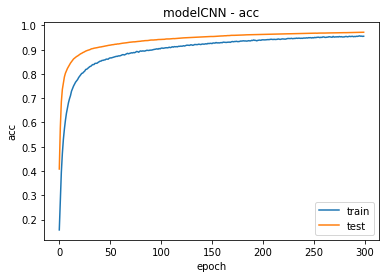

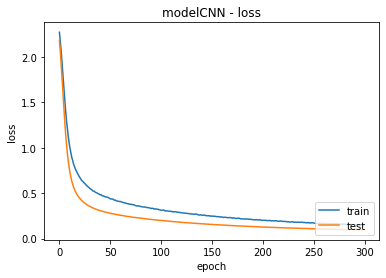

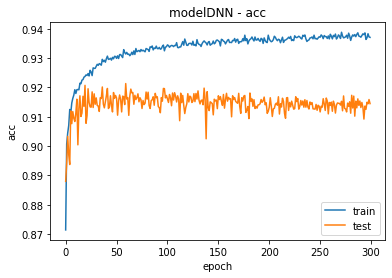

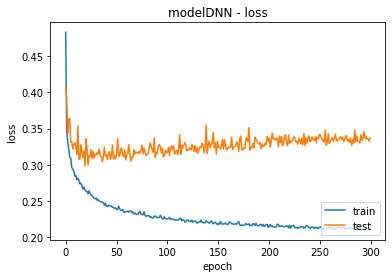

In [0]:
batch_size = 128
num_epoch = 300 #19:35 started, 20:25 ended
root_directory = "/content/drive/My Drive/COLAB/"

print("--------------------------------")
#przy gorszej wartosci accuracy dla większej ilosci epok nie powinien zapisywac do dysku google

x_train, y_train, x_test, y_test = load_data_for_NN(root_directory)

for model_name, model in [("CNN", model_CNN()), ("DNN", model_DNN())]:
  
#for model_name, model in [("CNN", model_CNN())]:
    model_log, model = fit_model(model, model_name, x_train, y_train, batch_size, num_epoch, root_directory)
    validate(model, x_train, y_train, x_test, y_test)
    save_model_plot(model, model_name, root_directory)
    save_history(model, model_name, root_directory)
    for metric_name in ['acc', 'loss']:
        plot_metric(model_log, metric_name, model_name, root_directory)

In [0]:
root_directory = "/content/drive/My Drive/COLAB/"

x_train, y_train, x_test, y_test = load_data_for_NN(root_directory)

# LOADING

In [0]:
model_name = "CNN"
checkpoint_path = get_checkpoint_path(model_name, root_directory)
checkpoint_dir = os.path.dirname(checkpoint_path)

model = model_CNN()
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

print(x_test[0].shape)
print(model.predict(x_test[0].reshape(1, 28, 28, 1)))

(28, 28, 1)
[[0.02081079 0.00221599 0.01361299 0.00401894 0.03379714 0.00661913
  0.00500597 0.87432575 0.01624172 0.02335158]]


In [0]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3629 - acc: 0.8968


[0.36286526918411255, 0.8967999815940857]